In [20]:
%matplotlib widget
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import cm

from planeslam.general import plot_3D_setup

In [39]:
# Load the points
datapath = os.path.join(os.getcwd(), 'data', '5_15_2022', 'fr_config_3')
P = np.load(os.path.join(datapath, 'pc_0.npy'))

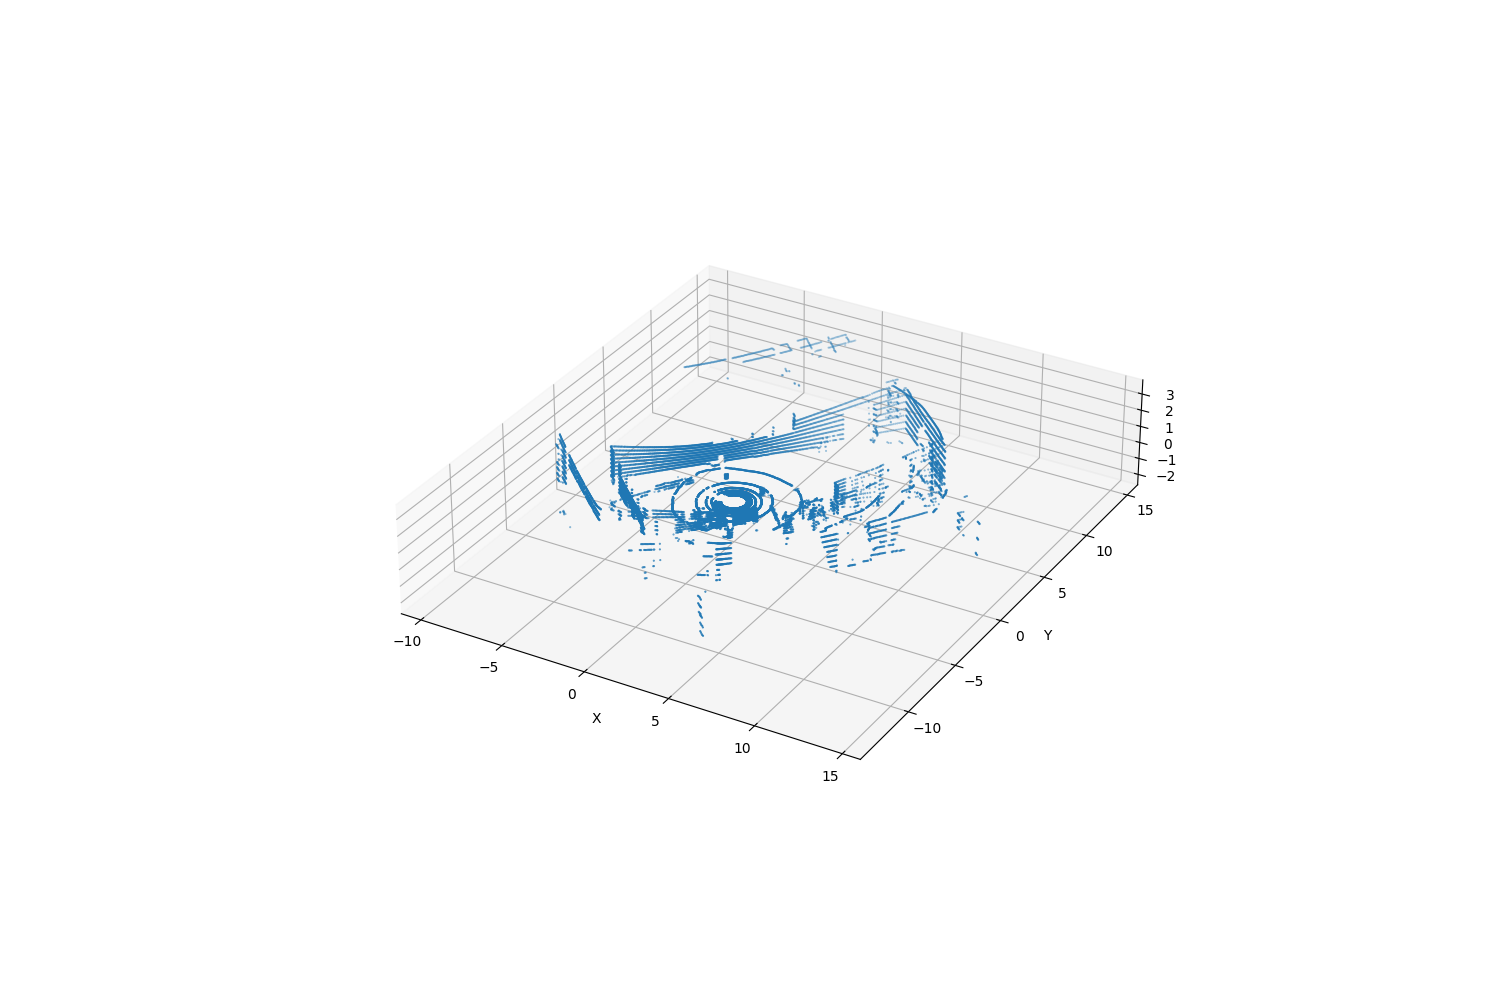

In [41]:
# Plot
ax = plot_3D_setup(P)
ax.scatter3D(P[:,0], P[:,1], P[:,2], s=1, marker='.') 

In [42]:
# Distance filter
def dist_filter(P, threshold):
    """Filter points by distance
    
    Parameters
    ----------
    P : np.array (n_pts x 3)
        Point cloud to filter

    Parameters
    ----------
    np.array (n_pts_filtered x 3)
        Filtered point cloud
    
    """
    dists = np.linalg.norm(P, axis=1)
    keep_idx = dists < threshold
    return P[keep_idx,:] 


In [45]:
P_filter = dist_filter(P, 4)

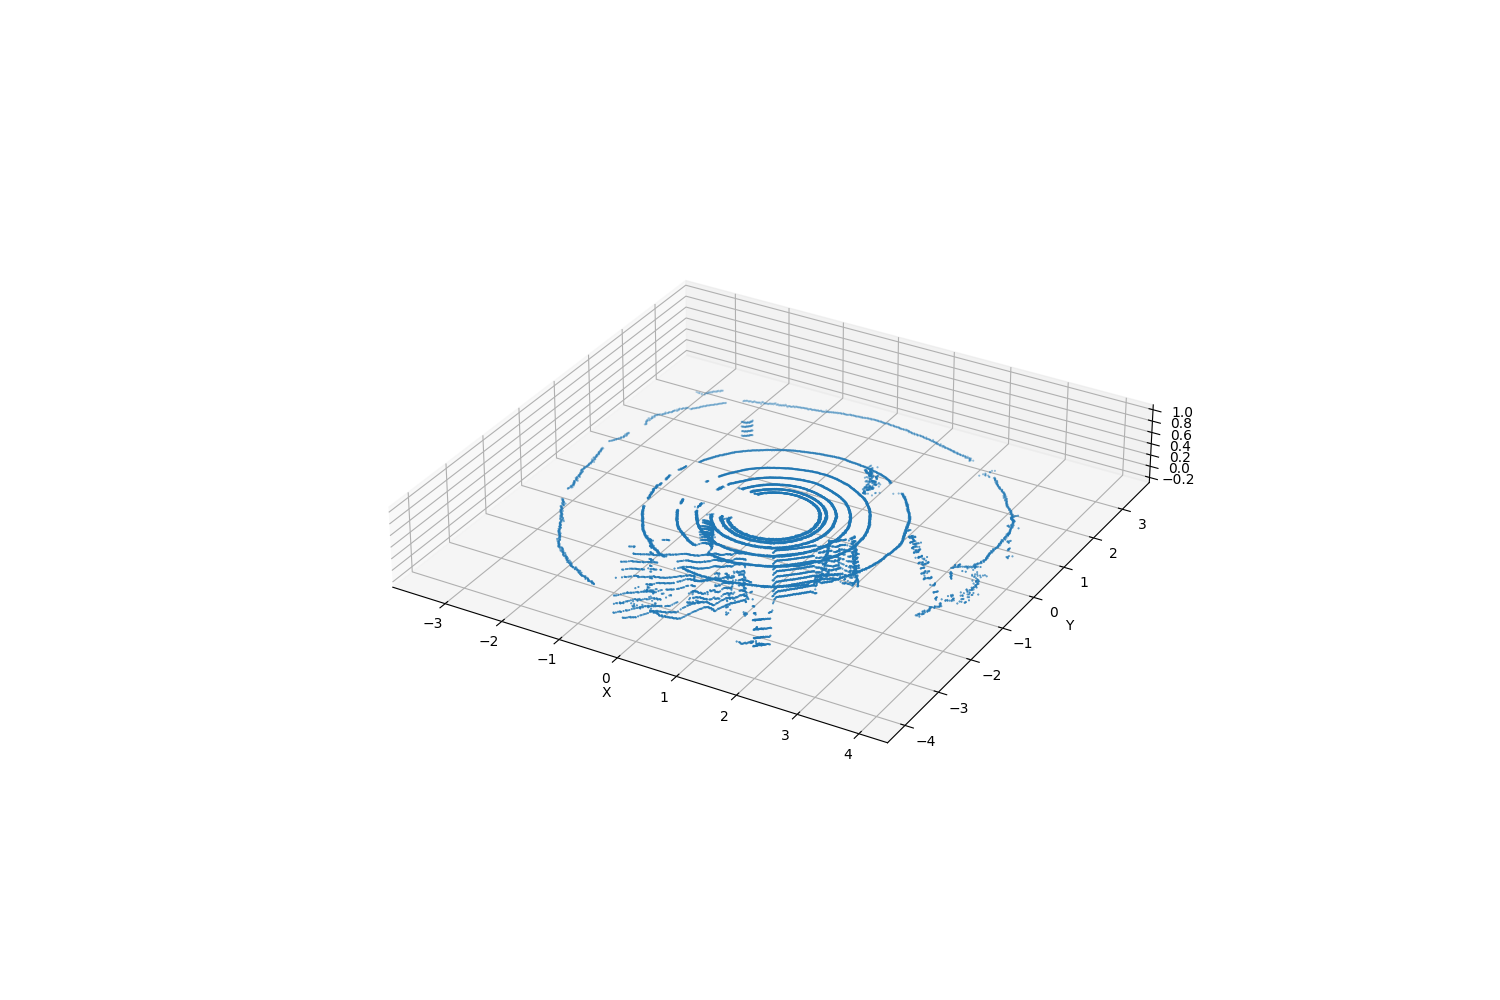

In [46]:
# Plot
ax = plot_3D_setup(P_filter)
ax.scatter3D(P_filter[:,0], P_filter[:,1], P_filter[:,2], s=1, marker='.') 

In [47]:
def spherical_project(P):
    """Project 3D point cloud to 2D using spherical projection
    
    Returns
    -------
    thetas : 
    phis :

    """
    thetas = np.arctan2(P[:,1], P[:,0])
    Rxy = np.sqrt(P[:,0]**2 + P[:,1]**2)
    phis = np.arctan2(P[:,2], Rxy)
    return thetas, phis

In [48]:
thetas, phis = spherical_project(P_filter)

In [49]:
# Color code by distance
dists = np.linalg.norm(P_filter, axis=1)
min_dist = min(dists)
max_dist = max(dists)

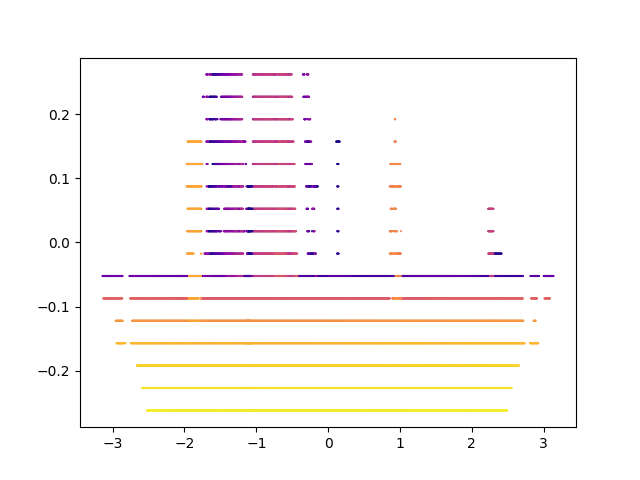

In [50]:
cmap = cm.get_cmap('plasma')
c_idx = list(np.interp(dists, [min_dist, max_dist], [255, 0]).astype(int))
colors = [cmap.colors[i] for i in c_idx]

fig, ax = plt.subplots()
c_idx = np.interp(dists, [min_dist, max_dist], [0, 255]).astype(int)
ax.scatter(thetas, phis, color=colors, s=1, marker='.')

In [ ]:
# Ground-plane removal?
# Background removal?